# Logistic map: bifurcation diagram of a simple chaotic dynamical system

Chaotic dynamics are typically associated with physical systems like the weather. Whether ecological systems could  be as unpredictable as the weather was a hotly disputed topic. However, simple models revealed that there was a high potential for chaotic dynamics in natural populations as in physical systems. It does require specific conditions.

Imagine a population of mosquitoes or other annual insect. They emerge from eggs or larvae at the beginning of the season. The insects feed on prey to be able to lay their eggs, and die at the end of the season. Hence, the entire population is replaced each year. We furthermore presume that the number of eggs is negatively related to insect density: when there are many individual insects, food availability is low, and the number of eggs is reduced.

$$
\begin{aligned}
N_{t+1} & = r N_{t} \big(1 - N_{t}\big) \\
\end{aligned}
$$

Here, $r$ is the maximal growth rate of the population of insects $X$. Moreover, $X$ is scaled between 0 and 1, meaning that 1 is the maximally attainable stable population.

Below we study this model, and reveal its chaotic dynamics, in Python.

### First we import some essential packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### The difference equation is represented as a function

In [2]:
def logistic(r, N):
    return r * N * (1.0 - N)

### A plot is made

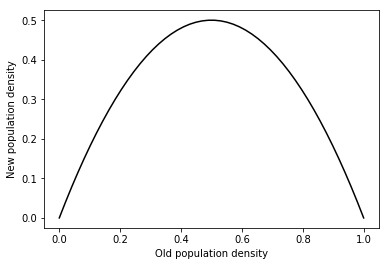

In [3]:
x = np.linspace(0, 1)             # A range of x values between 0 and 1
fig, ax = plt.subplots(1, 1)      # Making a single plot
f=ax.plot(x, logistic(2, x), 'k') # Plotting the growth rate versus population density
f=ax.set_xlabel('Old population density')  # X label
f=ax.set_ylabel('New population density')  # Y label

### Simulating population development
Here we first define the parameters that define the simulation, like the time step dT, en de time duration of the simulation (in virtual time) EndTime.

In [4]:
EndTime = 25     # The total length of the simulation in time units
dT = 1            # The time step             

The total number of iterations that the simulation has to do is determined by the required duration divided by the timestep. The int() function makes sure that the outcome is an discrete number.

In [5]:
Iterations = int(EndTime/dT)   # The number of time the simulation is run

Here the simulation is run

In [6]:
x=np.zeros(Iterations+1)
x[0]=0.5
for i in range(Iterations): 
    x[i+1] = logistic(3.6,x[i])

And then, the results are plotted

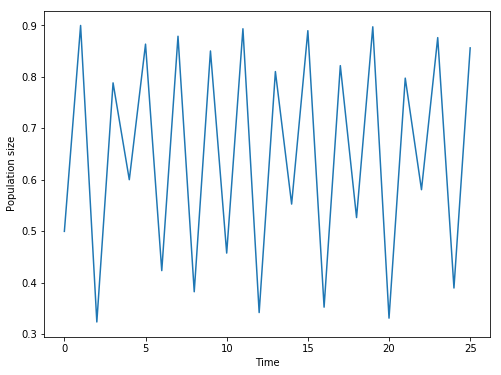

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(np.linspace(0,EndTime,len(x)),x)
a=plt.xlabel('Time')
b=plt.ylabel('Population size')

## The map of logistic chaos plotted in Jupyter

Here we do a so-called bifurcation analysis, in which we analyse the dynamics of the population along a range of $r$ values, to see whether there is any fundamental change in dynamics. A very conventient and spectacular-looking way is to plot say one hundred simulation results for each value of $r$. 

To do this, do the following: say we want to investigate $r = 2.5$ to $4.0$ with a resulution of 2000 steps. We then make two 1D arrays of 2000 points, one for $x$, and one for $r$.

In [8]:
n = 2000                       # The size of the X array
x = 1e-5 * np.ones(n)          # Here we define the X array 
r = np.linspace(2.5, 4.0, n)   # A specific value of r for each X population, 
                               # ranging from 2.5 to 4.0 

In [9]:
iterations = 1000              # The duration of the simulation
last = 100                     # Only the last 100 are plotted

### The simulation are run, and a plot is made

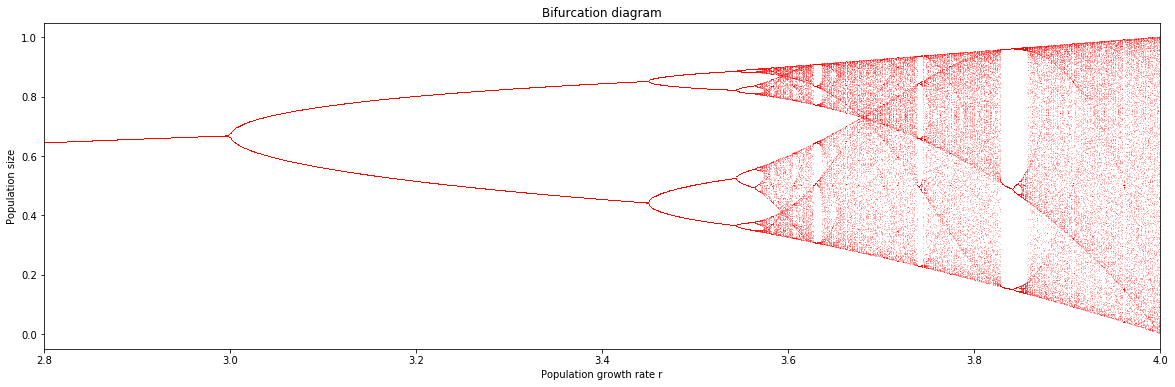

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20,6), sharex=True) # make a figure

# Here a time loop is defined simulating change for each of the n populations 
for t in range(iterations):
    x = logistic(r, x)
    # if we have arrived at the last 100, they are plotted
    if t >= (iterations - last):
          ax.plot(r, x, ',r', alpha=.25)
            
ax.set_xlim(2.8, 4)                           # The x axis is scaled
ax.set_xlabel('Population growth rate r')     # X label
ax.set_ylabel('Population size')              # Y label
f=ax.set_title("Bifurcation diagram")         # Plot title

### Cobwebbing the dynamics

There is a graphical method that can help explain and understand the dynamics of this chaotic population. It is called cobwebbing. The basis of this technique is to iterate the simulation in a population size versus population growth plot.

Wikipedia gives a short description of how to do this:
- A line x=y is drawn next the the curve defined by the logistic function $logistic()$
- You start somewhere along this line
- Now move up or down to the logistic curve
- Plot a dot here
- Move horizontally back to the y=x curve
- Repeat the process  

In case $r<3$, you will slowly step towards the equilibrium. But what will happen if you increase $r$. Try int out with the widget below.


In [11]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def plot_system(r, x0, n):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    xs=np.zeros(n)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4.5), gridspec_kw = {'width_ratios':[1, 2]}, sharey=True)
    ax1.plot(t, logistic(r, t), 'k', lw=2)
    ax1.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = logistic(r, x)
        xs[i]=x
        # Plot the two lines.
        ax1.plot([x, x], [x, y], 'k', lw=1)
        ax1.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax1.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y

    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    ax1.set_xlabel('Previous population size')
    ax1.set_ylabel('Next population size')
    ax1.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")
    
    ax2.plot(xs,'o-')
    ax2.set_xlim(0,n)
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Population density')

In [12]:
a=interact(plot_system, 
           r=widgets.FloatSlider(min=2,max=4,step=0.05,value=2.9), 
           x0=widgets.FloatSlider(min=0.0,max=1.0,step=0.05,value=0.1), 
           n=widgets.IntSlider(min=10,max=50,step=1,value=20))

interactive(children=(FloatSlider(value=2.9, description='r', max=4.0, min=2.0, step=0.05), FloatSlider(value=0.1, description='x0', max=1.0, step=0.05), IntSlider(value=20, description='n', max=50, min=10), Output()), _dom_classes=('widget-interact',))

Copyright Johan van de Koppel 2018